**Set environment**

In [145]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
suppressMessages(suppressWarnings(library("plyranges")))
suppressMessages(suppressWarnings(library("nullranges")))
suppressMessages(suppressWarnings(library("patchwork")))
show_env()

You are working on        Singularity 
BASE DIRECTORY (FD_BASE): /mount 
REPO DIRECTORY (FD_REPO): /mount/repo 
WORK DIRECTORY (FD_WORK): /mount/work 
DATA DIRECTORY (FD_DATA): /mount/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /mount/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /mount/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /mount/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /mount/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /mount/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /mount/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /mount/repo/Proj_ENCODE_FCC/log 
PROJECT APP     (FD_APP): /mount/repo/Proj_ENCODE_FCC/app 
PROJECT REF     (FD_REF): /mount/repo/Proj_ENCODE_FCC/references 



## Test create matrix

**Import Accessibility**

In [3]:
txt_fdiry = file.path(
    FD_RES,
    "region_coverage_fcc",
    "fcc_astarr_macs_input_overlap", 
    "STARR_ATAC_K562_Reddy_KS91",
    "overlap_score",
    "summary"
)

txt_fname = "result.coverage.TPM.FPKM.tsv"
txt_fpath = file.path(txt_fdiry, txt_fname)

dat = read_tsv(txt_fpath)

dat_region_astarr = dat
print(dim(dat))
head(dat)

Rows: 150041 Columns: 8
── Column specification ───────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): Chrom, Region
dbl (6): ChromStart, ChromEnd, Input_FPKM, Input_TPM, Output_FPKM, Output_TPM

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 150041      8


Chrom,ChromStart,ChromEnd,Region,Input_FPKM,Input_TPM,Output_FPKM,Output_TPM
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
chr1,10038,10405,chr1:10038-10405,0.004164383,3.940038,0.0007357323,0.7181993
chr1,14282,14614,chr1:14282-14614,0.003003325,2.841707,0.0022620843,2.2104314
chr1,16025,16338,chr1:16025-16338,0.004048701,3.830812,0.0012867327,1.2597204
chr1,17288,17689,chr1:17288-17689,0.006551198,6.198372,0.0017372529,1.7059186
chr1,28934,29499,chr1:28934-29499,0.004295316,4.064322,0.0006561996,0.6447721
chr1,115429,115969,chr1:115429-115969,0.015954822,15.096518,0.0282829448,27.6549997


**Import GC content**

In [4]:
txt_fdiry = file.path(
    FD_RES,
    "region_nuc",
    "fcc_astarr_macs"
)

txt_fname = "K562.hg38.ASTARR.macs.KS91.input.rep_all.max_overlaps.q5.bed.gz"
txt_fpath = file.path(txt_fdiry, txt_fname)

dat = read_tsv(txt_fpath, show_col_types = FALSE)
dat = dat %>% dplyr::select(
    `#1_usercol`,
    `2_usercol`,
    `3_usercol`,
    `5_pct_gc`,
    `12_seq_len`
)
colnames(dat) = c("Chrom", "ChromStart", "ChromEnd", "pGC", "Length")

dat = dat %>% dplyr::mutate(Region = fun_gen_region(Chrom, ChromStart, ChromEnd))

dat_region_pgc = dat
print(dim(dat))
head(dat)

[1] 150042      6


Chrom,ChromStart,ChromEnd,pGC,Length,Region
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
chr1,10038,10405,0.523161,367,chr1:10038-10405
chr1,14282,14614,0.578313,332,chr1:14282-14614
chr1,16025,16338,0.587859,313,chr1:16025-16338
chr1,17288,17689,0.625935,401,chr1:17288-17689
chr1,28934,29499,0.771681,565,chr1:28934-29499
chr1,115429,115969,0.381481,540,chr1:115429-115969


**Import FCC assay vote**

In [5]:
txt_fdiry = file.path(
    FD_RES, 
    "region_annotation", 
    "fcc_astarr_macs_input_overlap",
    "summary2"
)
txt_fname = "result.summary.fcc_peak_call.assayvote.gcfilter.tsv"
txt_fpath = file.path(txt_fdiry, txt_fname)

dat = read_tsv(txt_fpath, show_col_types = FALSE)

dat_region_fcc_assayvote = dat
print(dim(dat))
head(dat)

[1] 175421      3


Region,Num_Assay,Type
<chr>,<dbl>,<chr>
chr1:115429-115969,1,Enhancer
chr1:184091-184563,1,Enhancer
chr1:605104-605675,1,Enhancer
chr1:778233-779389,3,Enhancer
chr1:818708-819335,1,Enhancer
chr1:826796-828040,1,Enhancer


**Import annotation matrix**

In [6]:
txt_fdiry = file.path(
    FD_RES, 
    "region_annotation", 
    "fcc_astarr_macs_input_overlap",
    "summary"
)
txt_fname = "matrix.annotation.merge.chipseq_full.fcc.tss.tsv"
txt_fpath = file.path(txt_fdiry, txt_fname)

dat = read_tsv(txt_fpath, show_col_types = FALSE)

mat_region_annot = dat
print(dim(dat))
head(dat)

[1] 144537    540


Chrom,ChromStart,ChromEnd,Region,ASTARR_A,WSTARR_A,LMPRA_A,TMPRA_A,ASTARR_R,WSTARR_R,⋯,ZNF778,ZNF780A,ZNF785,ZNF79,ZNF83,ZNF830,ZNF84,ZSCAN29,ZSCAN32,ZZZ3
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1,10038,10405,chr1:10038-10405,0,0,0,0,1,0,⋯,0,0,0,0,0,0,0,0,0,0
chr1,16025,16338,chr1:16025-16338,0,0,0,0,1,0,⋯,0,0,0,0,0,0,0,0,0,0
chr1,17288,17689,chr1:17288-17689,0,0,0,0,1,0,⋯,0,0,0,0,0,0,0,0,0,0
chr1,28934,29499,chr1:28934-29499,0,0,0,0,1,0,⋯,0,0,0,0,0,0,0,0,0,0
chr1,115429,115969,chr1:115429-115969,1,0,0,0,0,0,⋯,0,0,0,0,0,0,0,1,0,0
chr1,136201,137353,chr1:136201-137353,0,0,0,0,1,0,⋯,0,0,0,0,0,0,0,0,0,0


## Distribution

Warning message:
“Removed 13 rows containing non-finite outside the scale range (`stat_bin()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”


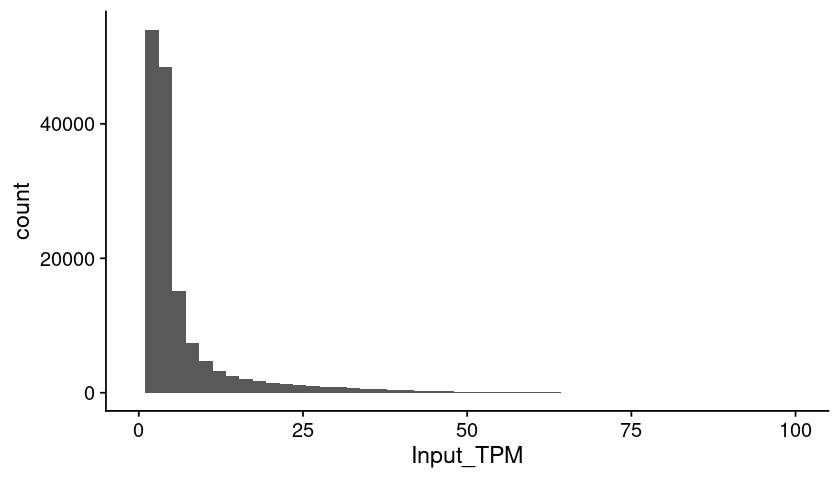

In [148]:
dat = dat_region_astarr 
gpt = ggplot(dat, aes(x=Input_TPM)) +
    geom_histogram(bins = 50) +
    xlim(0, 100) +
    theme_cowplot()

options(repr.plot.height = 4, repr.plot.width = 7)
print(gpt)

In [28]:
dat = dplyr::inner_join(
    dat_region_pgc,
    dat_region_astarr,
    by = c("Chrom", "ChromStart", "ChromEnd", "Region")
)

dat_region_test = dat
print(dim(dat))
head(dat)

[1] 150041     10


Chrom,ChromStart,ChromEnd,pGC,Length,Region,Input_FPKM,Input_TPM,Output_FPKM,Output_TPM
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
chr1,10038,10405,0.523161,367,chr1:10038-10405,0.004164383,3.940038,0.0007357323,0.7181993
chr1,14282,14614,0.578313,332,chr1:14282-14614,0.003003325,2.841707,0.0022620843,2.2104314
chr1,16025,16338,0.587859,313,chr1:16025-16338,0.004048701,3.830812,0.0012867327,1.2597204
chr1,17288,17689,0.625935,401,chr1:17288-17689,0.006551198,6.198372,0.0017372529,1.7059186
chr1,28934,29499,0.771681,565,chr1:28934-29499,0.004295316,4.064322,0.0006561996,0.6447721
chr1,115429,115969,0.381481,540,chr1:115429-115969,0.015954822,15.096518,0.0282829448,27.6549997


In [45]:
dat = dat_region_test
dat = dat %>%
    dplyr::mutate(
        pLog10_Signal = log10(Input_TPM + 1),
        pLog10_Length = log10(Length + 1),
        pLog10_GC     = log10(pGC + 1)
    )

vec = c("Input_TPM", "pGC", "Length", "pLog10_Signal", "pLog10_Length", "pLog10_GC")
dat = dat %>%
    tidyr::pivot_longer(
        cols      = any_of(vec),
        names_to  = "features",
        values_to = "values")

head(dat, 3)

Chrom,ChromStart,ChromEnd,Region,Input_FPKM,Output_FPKM,Output_TPM,features,values
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
chr1,10038,10405,chr1:10038-10405,0.004164383,0.0007357323,0.7181993,Input_TPM,3.940038
chr1,10038,10405,chr1:10038-10405,0.004164383,0.0007357323,0.7181993,pGC,0.523161
chr1,10038,10405,chr1:10038-10405,0.004164383,0.0007357323,0.7181993,Length,367.000000


In [46]:
lst = split(dat$values, dat$features)
lst = lapply(lst, summary)
lst[vec]

$Input_TPM
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
  0.0019   2.7417   3.6286   6.6648   6.2424 473.2625 

$pGC
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.2771  0.4651  0.5204  0.5269  0.5843  1.0000 

$Length
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0   401.0   597.0   712.8   909.0  6172.0 

$pLog10_Signal
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.0008313 0.5730688 0.6654455 0.7656378 0.8598817 2.6760188 

$pLog10_Length
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.301   2.604   2.777   2.786   2.959   3.790 

$pLog10_GC
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.1062  0.1659  0.1820  0.1832  0.1998  0.3010 


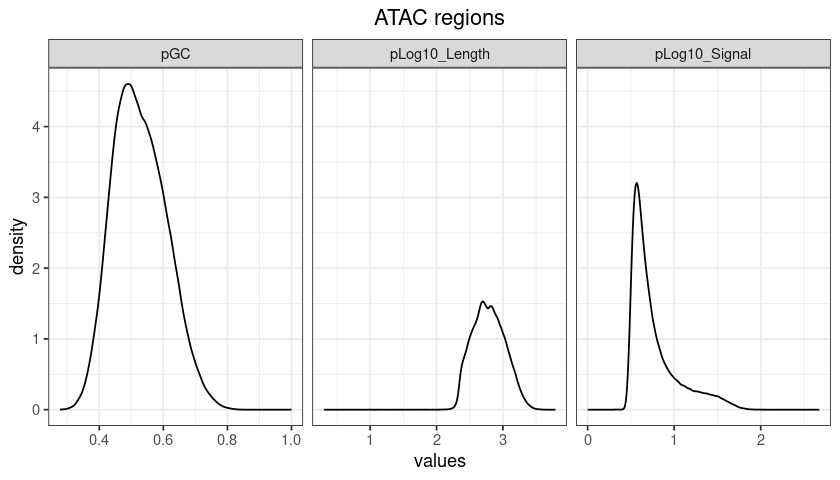

In [50]:
vec = c("pLog10_Signal", "pLog10_Length", "pGC")
tmp = dat %>% dplyr::filter(features %in% vec)

gpt = ggplot(tmp, aes(x=values)) +
    
    stat_density(geom='line', position='identity') +
    ggtitle("ATAC regions") +
    facet_wrap(~features, scales = "free_x") +
    theme_bw() +
    theme(plot.title=element_text(hjust=0.5))

options(repr.plot.height = 4, repr.plot.width = 7)
print(gpt)

## Test grange

In [51]:
dat = dat_region_test
grg = GRanges(
    seqnames = dat$Chrom,
    ranges   = IRanges(
        start = dat$ChromStart, 
        end   = dat$ChromEnd,  
        names = dat$Region
    ),
    strand = "*")
grg

GRanges object with 150041 ranges and 0 metadata columns:
                           seqnames              ranges strand
                              <Rle>           <IRanges>  <Rle>
          chr1:10038-10405     chr1         10038-10405      *
          chr1:14282-14614     chr1         14282-14614      *
          chr1:16025-16338     chr1         16025-16338      *
          chr1:17288-17689     chr1         17288-17689      *
          chr1:28934-29499     chr1         28934-29499      *
                       ...      ...                 ...    ...
  chrX:156000431-156003126     chrX 156000431-156003126      *
  chrX:156009723-156010194     chrX 156009723-156010194      *
  chrX:156016432-156016780     chrX 156016432-156016780      *
  chrX:156024963-156025554     chrX 156024963-156025554      *
  chrX:156030352-156030709     chrX 156030352-156030709      *
  -------
  seqinfo: 23 sequences from an unspecified genome; no seqlengths

In [52]:
values(grg) = dat
grg

GRanges object with 150041 ranges and 10 metadata columns:
                           seqnames              ranges strand |       Chrom
                              <Rle>           <IRanges>  <Rle> | <character>
          chr1:10038-10405     chr1         10038-10405      * |        chr1
          chr1:14282-14614     chr1         14282-14614      * |        chr1
          chr1:16025-16338     chr1         16025-16338      * |        chr1
          chr1:17288-17689     chr1         17288-17689      * |        chr1
          chr1:28934-29499     chr1         28934-29499      * |        chr1
                       ...      ...                 ...    ... .         ...
  chrX:156000431-156003126     chrX 156000431-156003126      * |        chrX
  chrX:156009723-156010194     chrX 156009723-156010194      * |        chrX
  chrX:156016432-156016780     chrX 156016432-156016780      * |        chrX
  chrX:156024963-156025554     chrX 156024963-156025554      * |        chrX
  chrX:156030352-

## Merge

In [198]:
dat = dplyr::inner_join(
    dat_region_pgc,
    dat_region_astarr,
    by = c("Chrom", "ChromStart", "ChromEnd", "Region")
)
dat = dat %>%
    dplyr::mutate(
        pLog10_Signal = log10(Input_TPM + 1),
        pLog10_Length = log10(Length + 1),
        pLog10_GC     = log10(pGC + 1),
    )

dat = dat %>% dplyr::left_join(
    mat_region_annot,
    by = c("Chrom", "ChromStart", "ChromEnd", "Region")
)
dat = dat %>% replace(is.na(.), 0)

dat_region_merge = dat
print(dim(dat))
head(dat)

[1] 150041    549


Chrom,ChromStart,ChromEnd,pGC,Length,Region,Input_FPKM,Input_TPM,Output_FPKM,Output_TPM,⋯,ZNF778,ZNF780A,ZNF785,ZNF79,ZNF83,ZNF830,ZNF84,ZSCAN29,ZSCAN32,ZZZ3
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1,10038,10405,0.523161,367,chr1:10038-10405,0.004164383,3.940038,0.0007357323,0.7181993,⋯,0,0,0,0,0,0,0,0,0,0
chr1,14282,14614,0.578313,332,chr1:14282-14614,0.003003325,2.841707,0.0022620843,2.2104314,⋯,0,0,0,0,0,0,0,0,0,0
chr1,16025,16338,0.587859,313,chr1:16025-16338,0.004048701,3.830812,0.0012867327,1.2597204,⋯,0,0,0,0,0,0,0,0,0,0
chr1,17288,17689,0.625935,401,chr1:17288-17689,0.006551198,6.198372,0.0017372529,1.7059186,⋯,0,0,0,0,0,0,0,0,0,0
chr1,28934,29499,0.771681,565,chr1:28934-29499,0.004295316,4.064322,0.0006561996,0.6447721,⋯,0,0,0,0,0,0,0,0,0,0
chr1,115429,115969,0.381481,540,chr1:115429-115969,0.015954822,15.096518,0.0282829448,27.6549997,⋯,0,0,0,0,0,0,0,1,0,0


## Label regions

In [268]:
fun_inner = function(num){
    if (num == 1){ return("Weak") }
    if (num == 2){ return("Middle") }
    if (num >= 3){ return("Strong") }
}
fun = function(vec){
    res = sapply(vec, fun_inner)
    return(res)
}

dat = dat_region_fcc_assayvote
dat = dat %>% 
    dplyr::mutate(
        Label = paste(fun(Num_Assay), Type, sep="_")
    )

dat_region_label = dat
print(dim(dat))
head(dat)

[1] 175421      4


Region,Num_Assay,Type,Label
<chr>,<dbl>,<chr>,<chr>
chr1:115429-115969,1,Enhancer,Weak_Enhancer
chr1:184091-184563,1,Enhancer,Weak_Enhancer
chr1:605104-605675,1,Enhancer,Weak_Enhancer
chr1:778233-779389,3,Enhancer,Strong_Enhancer
chr1:818708-819335,1,Enhancer,Weak_Enhancer
chr1:826796-828040,1,Enhancer,Weak_Enhancer


In [269]:
dat = dat_region_label
table(dat$Type, dat$Num_Assay)

                    
                         1     2     3     4
  Enhancer           27403 13617  6609    57
  Repressor          71923  2610     9     0
  Repressor_GCFilter 51591  1599     3     0

In [270]:
dat = dat_region_label
table(dat$Label)


          Middle_Enhancer          Middle_Repressor Middle_Repressor_GCFilter 
                    13617                      2610                      1599 
          Strong_Enhancer          Strong_Repressor Strong_Repressor_GCFilter 
                     6666                         9                         3 
            Weak_Enhancer            Weak_Repressor   Weak_Repressor_GCFilter 
                    27403                     71923                     51591 

In [271]:
dat = dat_region_pgc
vec = unique(dat$Region)
vec_txt_tot = vec

dat = dat_region_fcc_assayvote
dat = dat %>% dplyr::filter(Num_Assay >= 2)
#dat = dat %>% dplyr::filter(Type %in% c("Enhancer", "Repressor_GCFilter"))
vec = unique(dat$Region)
vec_txt_cre = vec

vec_txt_neg = setdiff(vec_txt_tot, vec_txt_cre)

print(length(vec_txt_tot))
print(length(vec_txt_cre))
print(length(vec_txt_neg))

[1] 150042
[1] 22517
[1] 127525


In [272]:
dat = dat_region_label
lst = split(dat$Region, dat$Label)
lst_vec_txt_cre = lst
print(names(lst))

[1] "Middle_Enhancer"           "Middle_Repressor"         
[3] "Middle_Repressor_GCFilter" "Strong_Enhancer"          
[5] "Strong_Repressor"          "Strong_Repressor_GCFilter"
[7] "Weak_Enhancer"             "Weak_Repressor"           
[9] "Weak_Repressor_GCFilter"  


## Create different region set (focal & pool)

In [273]:
dat = dat_region_merge
head(dat,3)

Chrom,ChromStart,ChromEnd,pGC,Length,Region,Input_FPKM,Input_TPM,Output_FPKM,Output_TPM,⋯,ZNF778,ZNF780A,ZNF785,ZNF79,ZNF83,ZNF830,ZNF84,ZSCAN29,ZSCAN32,ZZZ3
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1,10038,10405,0.523161,367,chr1:10038-10405,0.004164383,3.940038,0.0007357323,0.7181993,⋯,0,0,0,0,0,0,0,0,0,0
chr1,14282,14614,0.578313,332,chr1:14282-14614,0.003003325,2.841707,0.0022620843,2.2104314,⋯,0,0,0,0,0,0,0,0,0,0
chr1,16025,16338,0.587859,313,chr1:16025-16338,0.004048701,3.830812,0.0012867327,1.2597204,⋯,0,0,0,0,0,0,0,0,0,0


In [274]:
dat = dat_region_merge
lst = lst_vec_txt_cre
txt = "Strong_Enhancer"
vec = lst[[txt]]

dat_region_focal = dat %>% dplyr::filter(Region %in% vec)
dat_region_pool  = dat %>% dplyr::filter(Region %in% vec_txt_neg)

In [275]:
dat = dat_region_focal
grg = GRanges(
    seqnames = dat$Chrom,
    ranges   = IRanges(
        start = dat$ChromStart, 
        end   = dat$ChromEnd,  
    ),
    strand = "*")
values(grg) = dat

grg_region_focal = grg

In [276]:
dat = dat_region_pool
grg = GRanges(
    seqnames = dat$Chrom,
    ranges   = IRanges(
        start = dat$ChromStart, 
        end   = dat$ChromEnd
    ),
    strand = "*")
values(grg) = dat

grg_region_pool = grg

In [277]:
print(dim(dat_region_focal))
print(dim(dat_region_pool))

[1] 6666  549
[1] 127524    549


In [278]:
lst = list(
    "Focal" = dat_region_focal,
    "Pool"  = dat_region_pool
)
dat = bind_rows(lst, .id = "Set")

vec = c("pLog10_Signal", "pLog10_Length", "pLog10_GC")
dat = dat %>%
    tidyr::pivot_longer(
        cols      = any_of(vec),
        names_to  = "Feature",
        values_to = "Value")

head(dat, 3)

Set,Chrom,ChromStart,ChromEnd,pGC,Length,Region,Input_FPKM,Input_TPM,Output_FPKM,⋯,ZNF785,ZNF79,ZNF83,ZNF830,ZNF84,ZSCAN29,ZSCAN32,ZZZ3,Feature,Value
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
Focal,chr1,778233,779389,0.604671,1156,chr1:778233-779389,0.05637634,53.34677,0.1245579,⋯,0,0,0,0,0,1,0,0,pLog10_Signal,1.735174
Focal,chr1,778233,779389,0.604671,1156,chr1:778233-779389,0.05637634,53.34677,0.1245579,⋯,0,0,0,0,0,1,0,0,pLog10_Length,3.063333
Focal,chr1,778233,779389,0.604671,1156,chr1:778233-779389,0.05637634,53.34677,0.1245579,⋯,0,0,0,0,0,1,0,0,pLog10_GC,0.205386


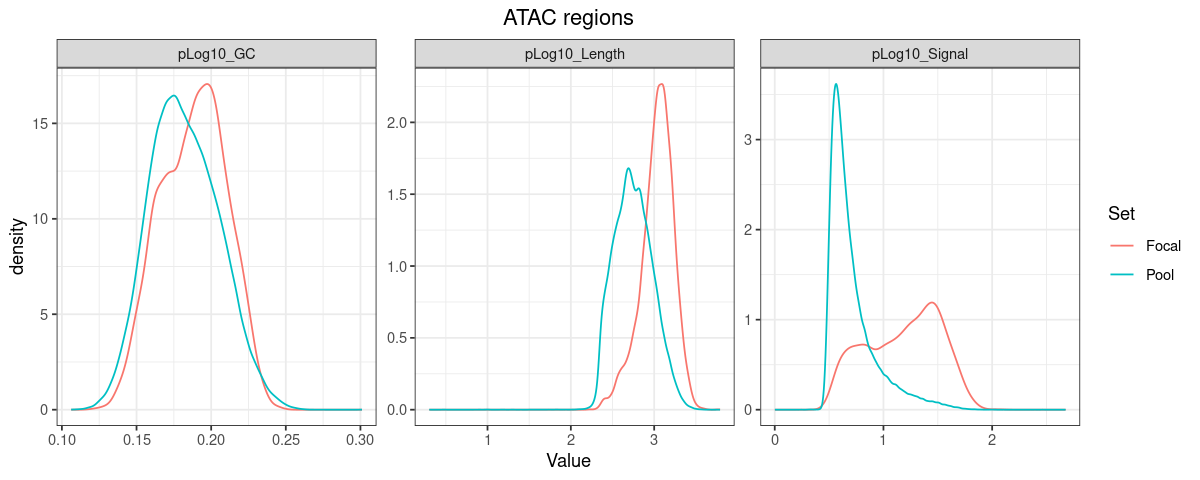

In [279]:
gpt = ggplot(dat, aes(x=Value, color=Set)) +
    stat_density(geom='line', position='identity') +
    ggtitle("ATAC regions") +
    #facet_wrap(~Feature, scales = "free_x") +
    facet_wrap(~Feature, scales = "free") +
    theme_bw() +
    theme(plot.title=element_text(hjust=0.5))

options(repr.plot.height = 4, repr.plot.width = 10)
print(gpt)

In [280]:
dat = bind_ranges(
    "Focal" = grg_region_focal, 
    "Pool"  = grg_region_pool, 
    .id="Set"
) %>% as.data.frame()

vec = c("pLog10_Signal", "pLog10_Length", "pLog10_GC")
dat = dat %>%
    tidyr::pivot_longer(
        cols      = any_of(vec),
        names_to  = "Feature",
        values_to = "Value")

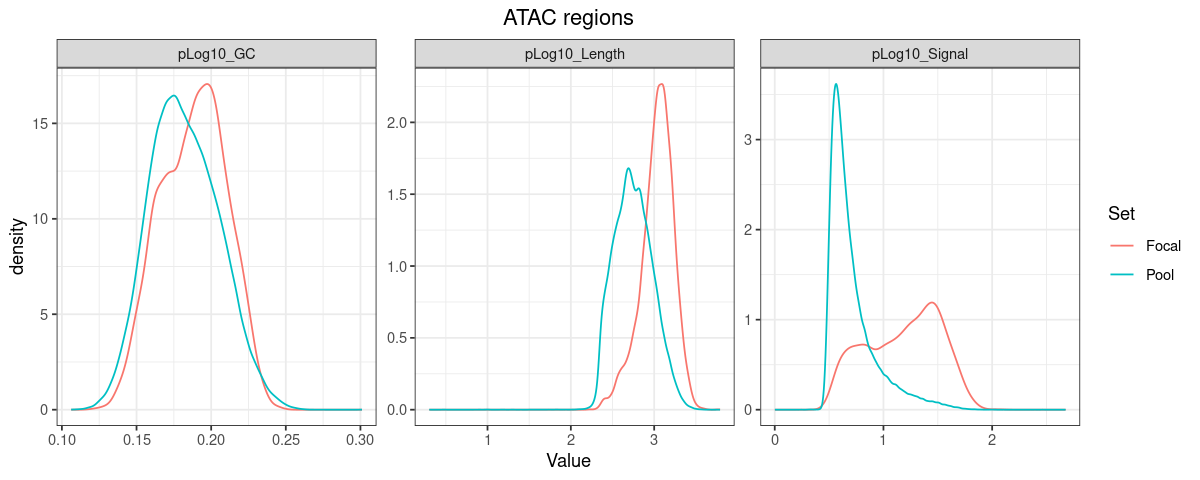

In [281]:
gpt = ggplot(dat, aes(x=Value, color=Set)) +
    stat_density(geom='line', position='identity') +
    ggtitle("ATAC regions") +
    facet_wrap(~Feature, scales = "free") +
    theme_bw() +
    theme(plot.title=element_text(hjust=0.5))

options(repr.plot.height = 4, repr.plot.width = 10)
print(gpt)

## Create null ranages

In [293]:
set.seed(123)
mgr = matchRanges(
    focal   = grg_region_focal,
    pool    = grg_region_pool,
    covar   = ~pLog10_Signal + pLog10_Length + pLog10_GC,
    method = 'stratified',
    replace = FALSE)


  Iteration 2, 129642 bin(s) [=======>----------------]  34% elapsed: 00:00:00

  Iteration 3, 129148 bin(s) [========>---------------]  38% elapsed: 00:00:00

  Iteration 4, 128926 bin(s) [========>---------------]  39% elapsed: 00:00:00

  Iteration 5, 128794 bin(s) [=========>--------------]  40% elapsed: 00:00:00

  Iteration 6, 128714 bin(s) [=========>--------------]  41% elapsed: 00:00:00

  Iteration 7, 128642 bin(s) [=========>--------------]  42% elapsed: 00:00:00

  Iteration 8, 128604 bin(s) [=========>--------------]  42% elapsed: 00:00:00

  Iteration 9, 128572 bin(s) [=========>--------------]  42% elapsed: 00:00:00

  Iteration 10, 128542 bin(s) [=========>-------------]  42% elapsed: 00:00:01

  Iteration 11, 128512 bin(s) [=========>-------------]  43% elapsed: 00:00:01

  Iteration 12, 128498 bin(s) [=========>-------------]  43% elapsed: 00:00:01

  Iteration 13, 128482 bin(s) [=========>-------------]  43% elapsed: 00:00:01

  Iteration 14, 128472 bin(s) [========

In [292]:
## Total number of duplicated indices
length(which(duplicated(indices(mgr))))

sum(table(indices(mgr)) > 1) # used more than once
sum(table(indices(mgr)) > 2) # used more than twice
sum(table(indices(mgr)) > 3) # used more than thrice

[1] 1703

[1] 1029

[1] 381

[1] 167

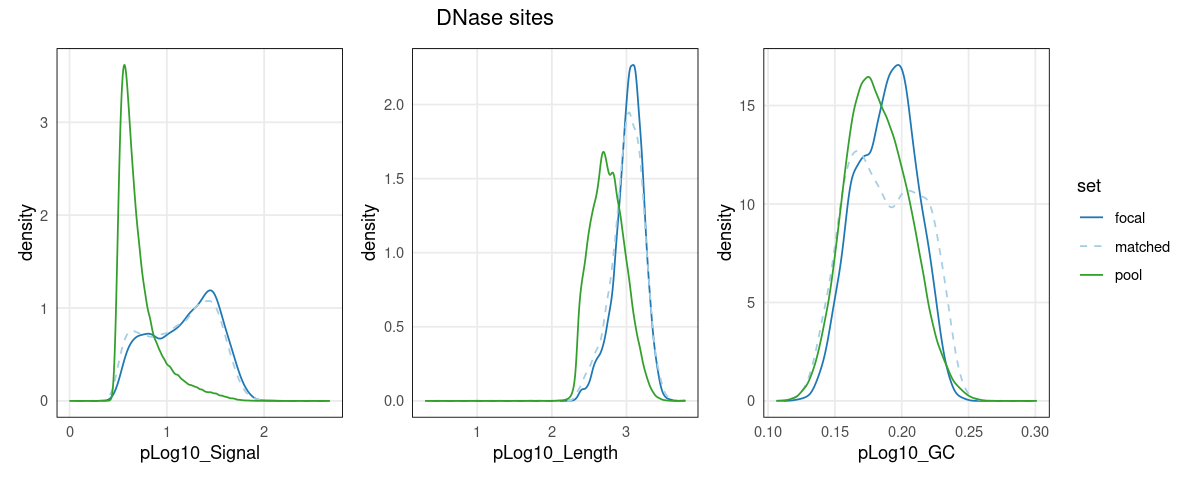

In [294]:
lst = lapply(covariates(mgr),
       plotCovariate,
       x = mgr,
       sets = c('f', 'm', 'p'))

plt = Reduce('+', x=lst) +
    plot_layout(guides = "collect") +
    plot_annotation(
        title="DNase sites",
        theme=theme(plot.title=element_text(hjust=0.40)))

options(repr.plot.height = 4, repr.plot.width = 10)
plt

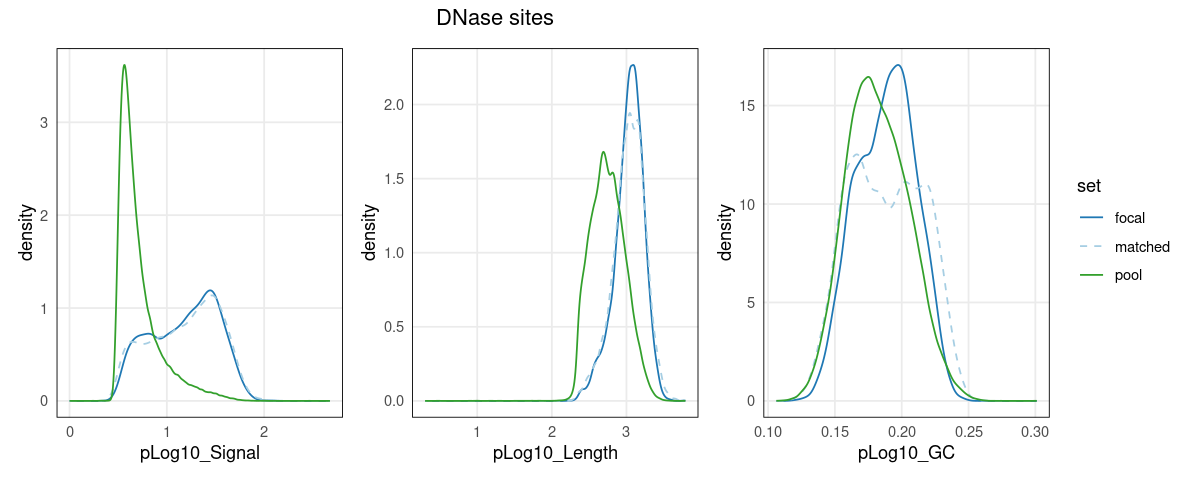

In [291]:
lst = lapply(covariates(mgr),
       plotCovariate,
       x = mgr,
       sets = c('f', 'm', 'p'))

plt = Reduce('+', x=lst) +
    plot_layout(guides = "collect") +
    plot_annotation(
        title="DNase sites",
        theme=theme(plot.title=element_text(hjust=0.40)))

options(repr.plot.height = 4, repr.plot.width = 10)
plt

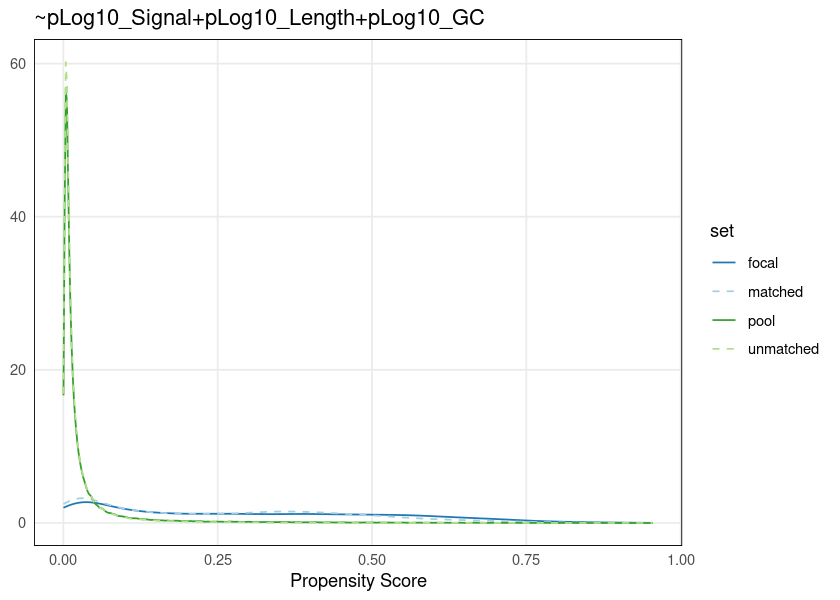

In [285]:
options(repr.plot.height = 5, repr.plot.width = 7)
plotPropensity(mgr)

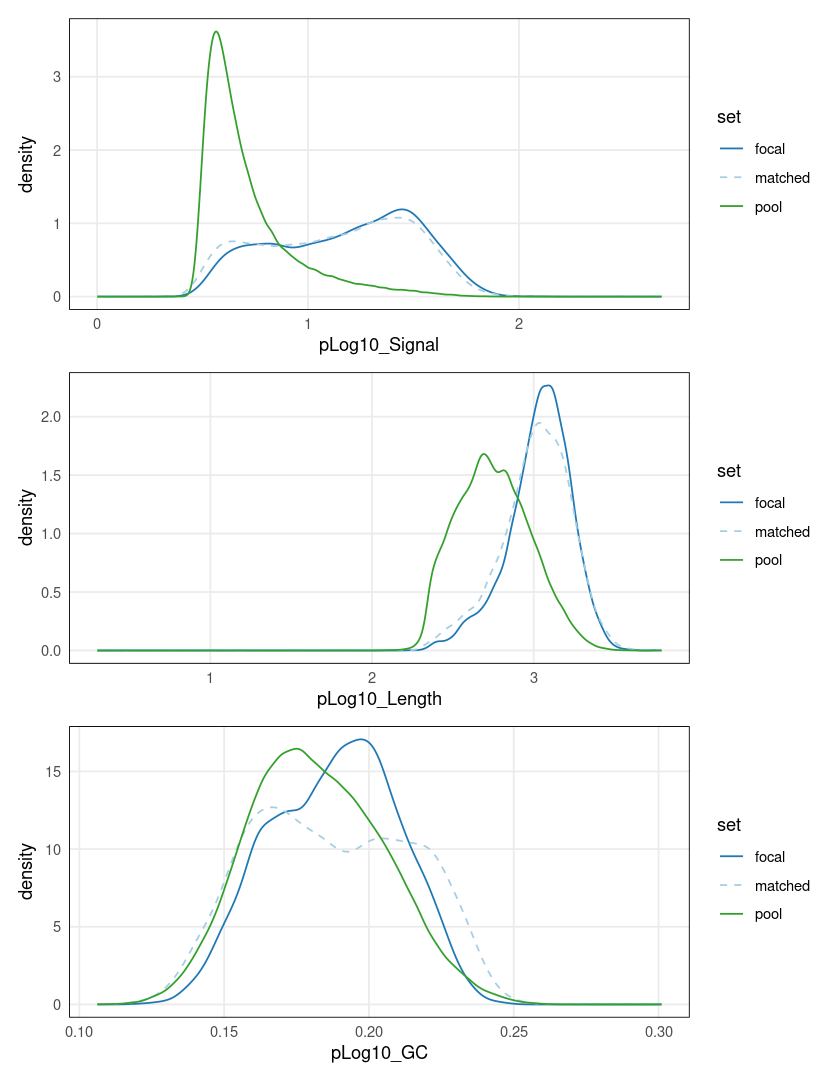

In [286]:
options(repr.plot.height = 9, repr.plot.width = 7)
plots <- lapply(covariates(mgr), plotCovariate, x=mgr, sets = c('f', 'm', 'p'))
Reduce('/', plots)

In [287]:
library(cobalt)
res <- bal.tab(f.build("set", covariates(mgr)),
               data = matchedData(mgr),
               distance = "ps", # name of column containing propensity score
               focal = "focal", # name of focal group in set column
               which.treat = "focal", # compare everything to focal
               s.d.denom = "all") # how to adjust standard deviation

res

Balance by treatment pair

 - - - focal (0) vs. matched (1) - - - 
Balance Measures
                  Type Diff.Un
ps            Distance -0.3876
pLog10_Signal  Contin. -0.1856
pLog10_Length  Contin. -0.1052
pLog10_GC      Contin. -0.0286

Sample sizes
    focal matched
All  6666    6666

 - - - focal (0) vs. pool (1) - - - 
Balance Measures
                  Type Diff.Un
ps            Distance -2.5638
pLog10_Signal  Contin. -1.9667
pLog10_Length  Contin. -1.2168
pLog10_GC      Contin. -0.2583

Sample sizes
    focal   pool
All  6666 127524

 - - - focal (0) vs. unmatched (1) - - - 
Balance Measures
                  Type Diff.Un
ps            Distance -2.6839
pLog10_Signal  Contin. -2.0649
pLog10_Length  Contin. -1.2781
pLog10_GC      Contin. -0.2710

Sample sizes
    focal unmatched
All  6666    120858
 - - - - - - - - - - - - - - - - - - - - - - - - - - 


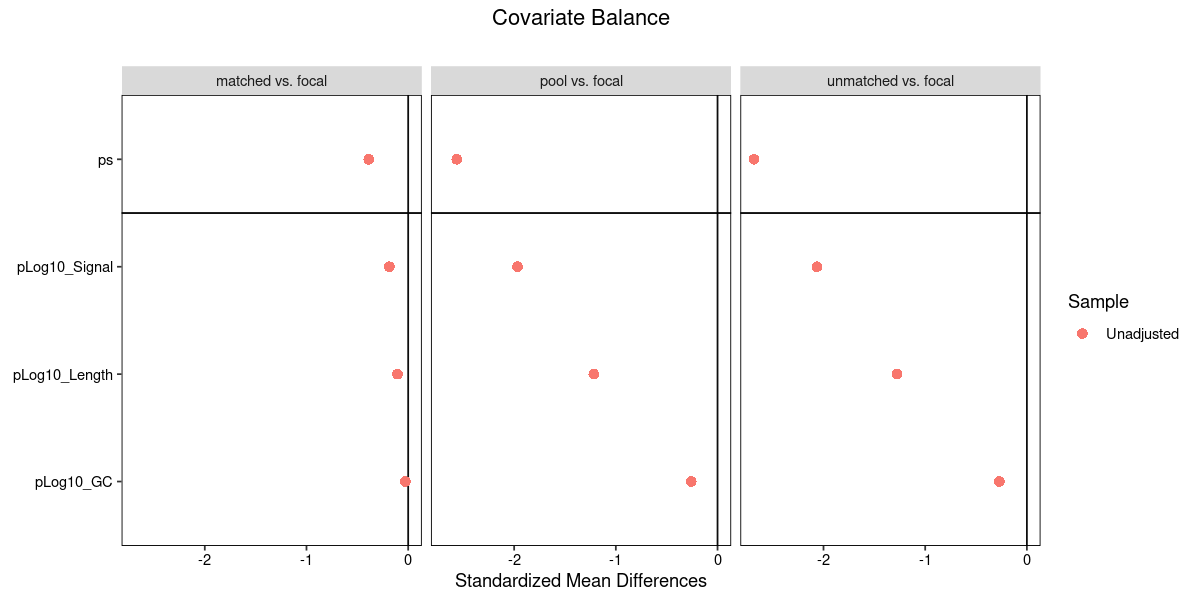

In [288]:
options(repr.plot.height = 5, repr.plot.width = 10)
love.plot(res)

[1] 0

[1] 0

[1] 0

[1] 0